In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


In [2]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
df = pd.read_csv('../input/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df = df.drop('Time',axis=1)

In [8]:
X = df.drop('Class',axis=1).values 
y = df['Class'].values

In [9]:
X.shape

(284807, 29)

In [10]:
X -= X.min(axis=0)
X /= X.max(axis=0)

In [11]:
X.mean()

0.5213456986251124

In [12]:
X.shape

(284807, 29)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.


In [15]:
data_in = Input(shape=(29,))
encoded = Dense(12,activation='tanh')(data_in)
decoded = Dense(29,activation='sigmoid')(encoded)
autoencoder = Model(data_in,decoded)

In [16]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
autoencoder.fit(X_train,
                X_train,
                epochs = 20, 
                batch_size=128, 
                validation_data=(X_test,X_test))

Train on 256326 samples, validate on 28481 samples
Epoch 1/20
256326/256326 [==============================] - 8s 29us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 2/20
256326/256326 [==============================] - 7s 26us/step - loss: 0.0012 - val_loss: 7.5711e-04
Epoch 3/20
256326/256326 [==============================] - 7s 26us/step - loss: 5.9954e-04 - val_loss: 5.0860e-04
Epoch 4/20
256326/256326 [==============================] - 7s 26us/step - loss: 4.3634e-04 - val_loss: 3.8141e-04
Epoch 5/20
256326/256326 [==============================] - 7s 26us/step - loss: 3.4394e-04 - val_loss: 3.1408e-04
Epoch 6/20
256326/256326 [==============================] - 7s 26us/step - loss: 2.9318e-04 - val_loss: 2.8245e-04
Epoch 7/20
256326/256326 [==============================] - 7s 26us/step - loss: 2.6792e-04 - val_loss: 2.5355e-04
Epoch 8/20
256326/256326 [==============================] - 7s 26us/step - loss: 2.3752e-04 - val_loss: 2.2938e-04
Epoch 9/20
256326/256326 [===============

In [18]:
X_test.mean()

0.5214011426360144

In [19]:
pred = autoencoder.predict(X_test[0:10])

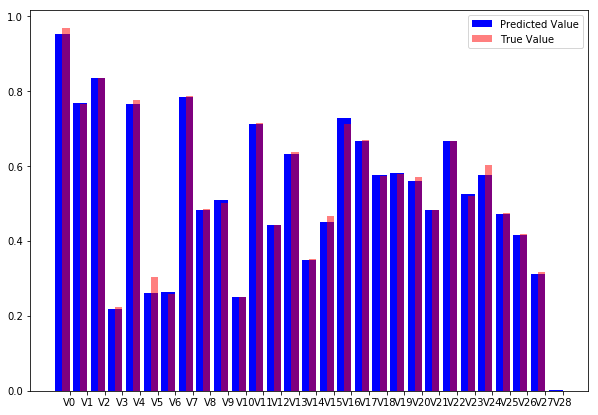

In [20]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.8

prediction   = pred[9]
true_value    = X_test[9]

indices = np.arange(len(prediction))

fig = plt.figure(figsize=(10,7))

plt.bar(indices, prediction, width=width, 
        color='b', label='Predicted Value')

plt.bar([i+0.25*width for i in indices], true_value, 
        width=0.5*width, color='r', alpha=0.5, label='True Value')

plt.xticks(indices+width/2., 
           ['V{}'.format(i) for i in range(len(prediction))] )

plt.legend()

plt.show()

In [21]:
encoder = Model(data_in,encoded)

In [22]:
enc = encoder.predict(X_test)

In [23]:
np.savez('enc.npz',enc,y_test)

In [24]:
#from sklearn.manifold import TSNE

In [25]:
#tsne = TSNE(verbose=1,n_iter=300)

In [26]:
#res = tsne.fit_transform(enc)

In [27]:
'''
fig = plt.figure(figsize=(10,7))
scatter =plt.scatter(res[:,0],res[:,1],c=y_test,cmap='coolwarm', s=0.6)
scatter.axes.get_xaxis().set_visible(False)
scatter.axes.get_yaxis().set_visible(False)
'''

"\nfig = plt.figure(figsize=(10,7))\nscatter =plt.scatter(res[:,0],res[:,1],c=y_test,cmap='coolwarm', s=0.6)\nscatter.axes.get_xaxis().set_visible(False)\nscatter.axes.get_yaxis().set_visible(False)\n"

# VAE

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics

In [29]:
batch_size = 100
original_dim = 29
latent_dim = 6
intermediate_dim = 16
epochs = 50
epsilon_std = 1.0


In [30]:
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [31]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [32]:
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [33]:
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
h_decoded = decoder_h(z)

decoder_mean = Dense(original_dim)
x_decoded_mean = decoder_mean(h_decoded)

In [34]:
# instantiate VAE model
vae = Model(x, x_decoded_mean)

In [35]:
# Compute VAE loss
xent_loss = original_dim * metrics.mean_squared_error(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

In [36]:
vae.add_loss(vae_loss)

In [37]:
from keras.optimizers import RMSprop
vae.compile(optimizer=RMSprop(lr=0.1))
#vae.summary()


In [38]:
vae.fit(X_train,
        shuffle=True,
        epochs=epochs,
        batch_size=256,
        validation_data=(X_test, None))

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 5s 18us/step - loss: 3.5317 - val_loss: 0.1338
Epoch 2/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1327 - val_loss: 0.1285
Epoch 3/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1326 - val_loss: 0.1293
Epoch 4/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1326 - val_loss: 0.1325
Epoch 5/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1327 - val_loss: 0.1200
Epoch 6/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1328 - val_loss: 0.1358
Epoch 7/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1326 - val_loss: 0.1296
Epoch 8/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1326 - val_loss: 0.1369
Epoch 9/50
256326/256326 [==============================] - 4s 17us/step - loss: 0.1326 - val

In [39]:
pred = autoencoder.predict(X_test[0:10])

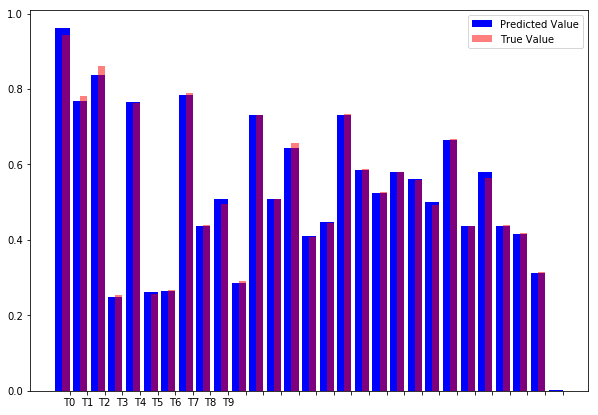

In [41]:

import matplotlib.pyplot as plt
import numpy as np

width = 0.8

prediction   = pred[1]
true_value    = X_test[1]

indices = np.arange(len(prediction))

fig = plt.figure(figsize=(10,7))

plt.bar(indices, prediction, width=width, 
        color='b', label='Predicted Value')

plt.bar([i+0.25*width for i in indices], true_value, 
        width=0.5*width, color='r', alpha=0.5, label='True Value')

plt.xticks(indices+width/2., 
           ['T{}'.format(i) for i in range(len(pred))] )

plt.legend()

plt.show()

In [42]:
frauds = np.where(y_train == 1)

In [43]:
encoder = Model(x,z_mean)

In [44]:
fraud_encodings = encoder.predict(X_train[frauds],batch_size=128)

In [45]:
fraud_encodings.shape

(443, 6)

In [46]:
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [47]:
more_frauds = generator.predict(fraud_encodings)